# Period-$\phi_{31}$-[Fe/H] Relationship and Comparison

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore') 

# Reading the data from respective files and merging

df1=pd.read_csv("efourier_parameters_n4_1.txt",usecols=['gaiaid','period','p1','p3','ep1','ep3'])
df1['p31'] = df1['p3'] - 3*df1['p1']
df1['ep31'] = df1['ep3'] - 3*df1['ep1']
df2=pd.read_csv("merged_data.txt",usecols=['gaiaid','feh','feh_e'])
merged_df=df1.merge(df2,how='left',on='gaiaid')

# Extracting the required columns: period, fourier parameter and fe/h

p31=merged_df['p31']
period=merged_df['period']
feh=merged_df['feh']
feh_e=merged_df['feh_e']
ep31 = merged_df['ep31']

# 2*pi ambiguity removal 

for i in range(len(p31)):
    while(p31[i]<0):
        p31[i]+=2*np.pi
    while(p31[i]>2*np.pi):
        p31[i]-=2*np.pi
# 2*sigma clipping

lower_bound = np.mean(p31) - 2*np.std(p31)
upper_bound = np.mean(p31) + 2*np.std(p31)
mask = (p31 >= lower_bound) & (p31 <= upper_bound)
p31 = p31[mask]
period = period[mask]
feh = feh[mask]
feh_e = feh_e[mask]
ep31 = ep31[mask]
ep31 = abs(ep31)


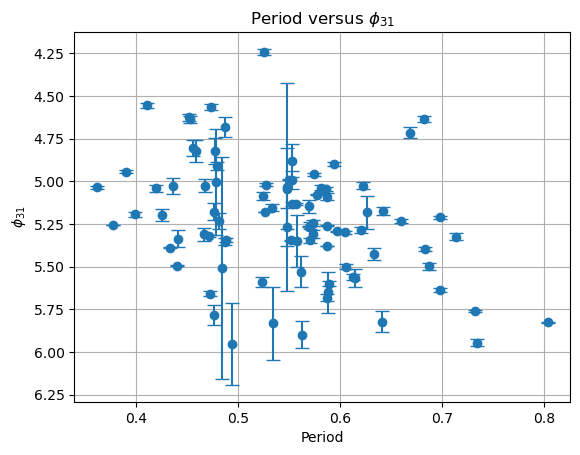

In [3]:
# Plotting fourier parameter versus the period

plt.title("Period versus $\phi_{31}$")
plt.xlabel("Period")
plt.ylabel("$\phi_{31}$")
plt.errorbar(period, p31,fmt = 'o',yerr = ep31,capsize=5)
plt.gca().invert_yaxis()
plt.grid()


In [6]:
from scipy.odr import Data, Model, ODR

# Function to which the data is to be fitted

def f(B,X):
    return B[0]+B[1]*X[0]+B[2]*X[1]

# ODR Routine

linear = Model(f)
mydata = Data((period,p31),feh)
myodr = ODR(mydata, linear, beta0=[1., 1., 1.])
myoutput = myodr.run()
myoutput.pprint()

Beta: [-3.49451694 -8.16064278  1.24971763]
Beta Std Error: [0.72132025 0.71327166 0.1525111 ]
Beta Covariance: [[187.88402126 -11.73393447 -34.56219653]
 [-11.73393447 183.71454118 -17.03357018]
 [-34.56219653 -17.03357018   8.39917288]]
Residual Variance: 0.0027692770271010446
Inverse Condition #: 0.011159680373295663
Reason(s) for Halting:
  Sum of squares convergence


In [8]:
# Remove outliers from the predicted data for robust fitting
sd_beta = myoutput.sd_beta
beta = myoutput.beta
predicted_Feh = beta[0]+beta[1]*period+beta[2]*p31
Feh_diff = feh - predicted_Feh # Difference between the predicted and calibrated [Fe/H] values

# 4*sigma clipping

lower_bound = np.mean(Feh_diff) - 3*np.std(Feh_diff)
upper_bound = np.mean(Feh_diff) + 3*np.std(Feh_diff)
mask = (Feh_diff >= lower_bound) & (Feh_diff <= upper_bound)
Feh_diff = Feh_diff[mask]
feh = feh[mask]
period = period[mask]
p31 = p31[mask]
feh_e = feh_e[mask]
# ODR Routine

linear = Model(f)
mydata = Data((period,p31),feh)
myodr = ODR(mydata, linear, beta0=[0., 0., 0.])
myoutput = myodr.run()
myoutput.pprint()

Beta: [-4.11088097 -7.83678035  1.33724724]
Beta Std Error: [0.65180114 0.60963597 0.139189  ]
Beta Covariance: [[182.76991802  -2.93831538 -34.57001048]
 [ -2.93831538 159.8879208  -16.26045938]
 [-34.57001048 -16.26045938   8.33459133]]
Residual Variance: 0.0023244784011140305
Inverse Condition #: 0.010965513984627003
Reason(s) for Halting:
  Sum of squares convergence


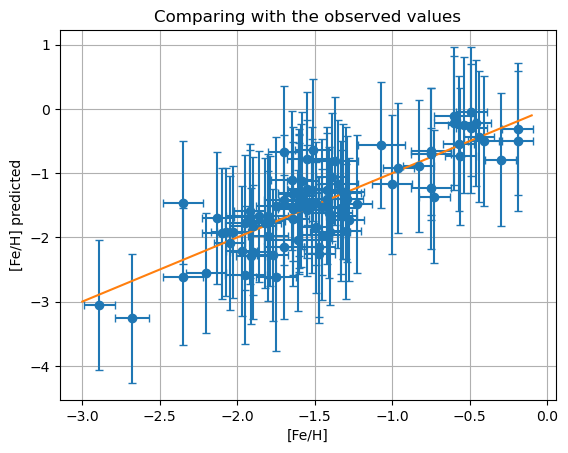

In [12]:
# Plotting the predicted fe/h with respect to the fe/h from observation
plt.title("Comparing with the observed values")
plt.ylabel("[Fe/H] predicted")
plt.xlabel("[Fe/H]")
err_feh = np.sqrt(sd_beta[0]**2 + (period* sd_beta[1])**2 + (p31* sd_beta[2])**2)
plt.errorbar(feh,predicted_Feh, yerr=err_feh,xerr = feh_e, fmt='o', capsize=3)
#plt.xlim(-4.1,1)
#plt.ylim(-4.1,1)
sample = np.arange(-3,0,0.1)
plt.plot(sample,sample)
plt.grid()

Text(0.5, 1.0, 'Comparison with N13')

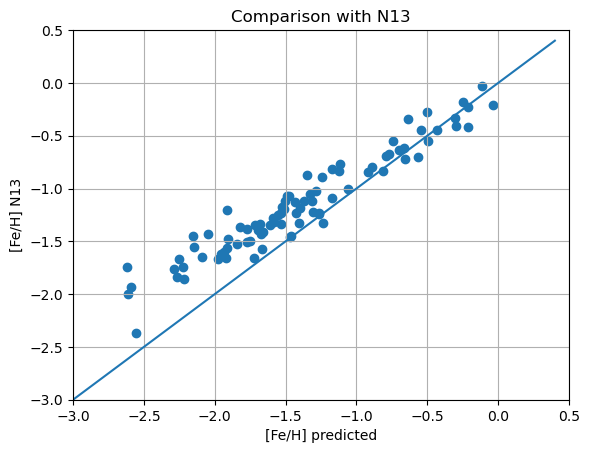

In [24]:
plt.scatter(predicted_Feh,Feh_N13)
plt.xlim(-3,0.5)
plt.ylim(-3,0.5)
sample=np.arange(-3,0.5,0.1)
plt.plot(sample,sample)
plt.grid()
plt.xlabel("[Fe/H] predicted")
plt.ylabel("[Fe/H] N13")
plt.title("Comparison with N13")

Text(0.5, 1.0, 'Comparison with JK96')

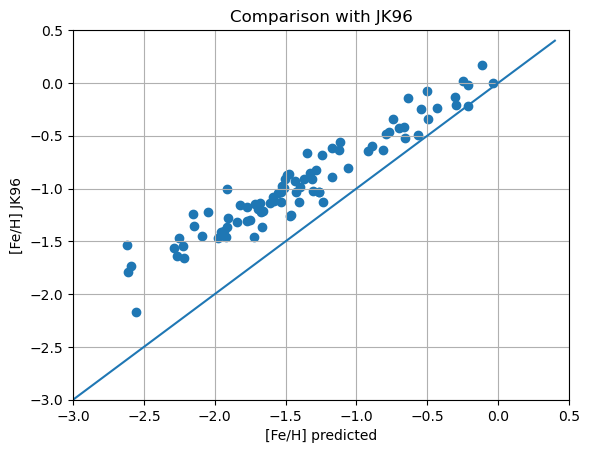

In [26]:
plt.scatter(predicted_Feh,Feh_JK96)
plt.xlim(-3,0.5)
plt.ylim(-3,0.5)
sample=np.arange(-3,0.5,0.1)
plt.plot(sample,sample)
plt.grid()
plt.xlabel("[Fe/H] predicted")
plt.ylabel("[Fe/H] JK96")
plt.title("Comparison with JK96")

Text(0.5, 1.0, 'Comparison with other literatures')

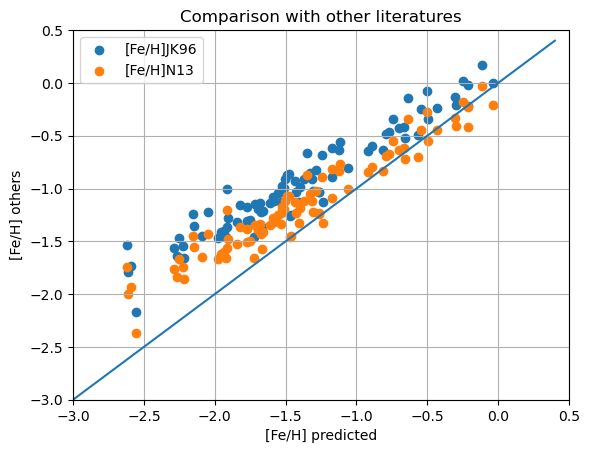

In [20]:
plt.scatter(predicted_Feh,Feh_JK96)
plt.scatter(predicted_Feh,Feh_N13)
plt.xlim(-3,0.5)
plt.ylim(-3,0.5)
sample=np.arange(-3,0.5,0.1)
plt.plot(sample,sample)
plt.grid()
plt.xlabel("[Fe/H] predicted")
plt.ylabel("[Fe/H] others")
plt.legend(['[Fe/H]JK96','[Fe/H]N13'])
plt.title("Comparison with other literatures")